In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/mw/2cx6x93d04g09y_zdvpb9vpc0000gn/T/ipykernel_99483/3805004192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['Date'] = pd.to_datetime(df_timeseries['Date'])


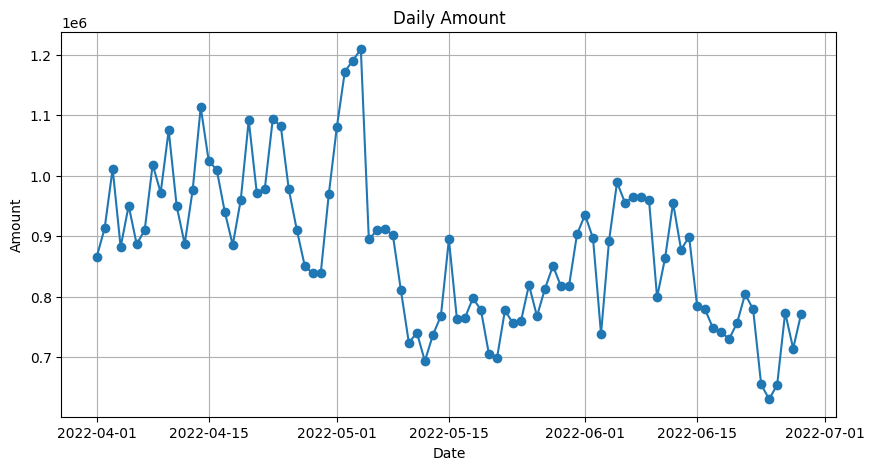

In [3]:
## PREPROCESSING
# Load DataFrame
df = pd.read_excel('./AmazonSaleReport.xlsx') 
df_timeseries = df[['Date', 'Amount']] 

# Transform date into datetime object
df_timeseries['Date'] = pd.to_datetime(df_timeseries['Date'])

# Set Date as Index
df_timeseries.set_index('Date', inplace=True)
df_timeseries.head()  # Display the first few rows of the dataframe with the new index
df.sort_index(inplace=True) 

# Resample DataFrame, I am applying a rolling window of 1 day, smoothing the data
df_resampled = df_timeseries.resample('D').sum()  # Resample by day and sum the 'Amount' column

# exclude the first and last date
df_resampled = df_resampled[1:-1]

# Plot the resampled data
plt.figure(figsize=(10, 5))
plt.plot(df_resampled.index, df_resampled['Amount'], marker='o')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [ ]:
# possibility to implement various rolling windows and then compare the results

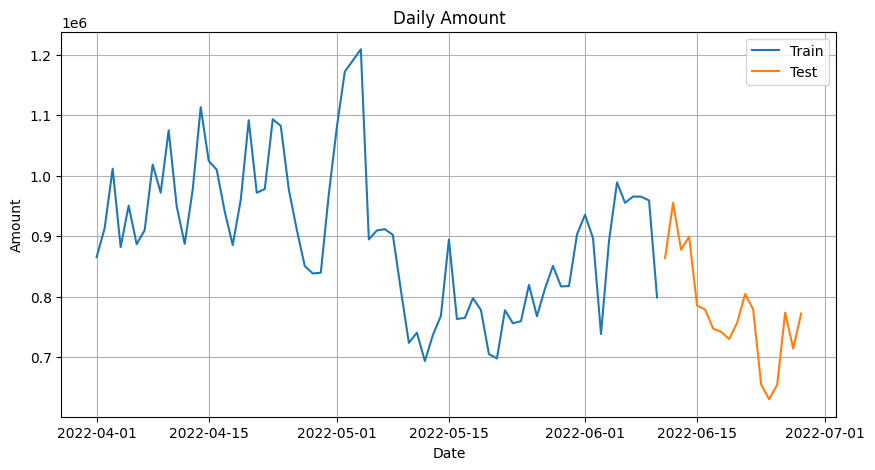

In [4]:
# Split the data into training and testing sets
# 80% for training, 20% for testing
# We do not shuffle the data because the order is important in time series
train_size = int(len(df_resampled) * 0.8)  # 80% for training, 20% for testing
train, test = df_resampled.iloc[:train_size], df_resampled.iloc[train_size:]

# Plot the train vs the test data
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Amount'], label='Train')
plt.plot(test.index, test['Amount'], label='Test')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.show()

# CHECKING STATIONARITY

In [6]:
# ADF TEST
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_resampled['Amount'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation of the ADF test
if result[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -3.0968700535458162
p-value: 0.026785687306877377
Critical Values: {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}
The time series is stationary (reject the null hypothesis).


In [7]:
# KPSS TEST
from statsmodels.tsa.stattools import kpss
result = kpss(df_resampled['Amount'])
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[3])

# Interpretation of the KPSS test
if result[1] < 0.05:
    print("The time series is not stationary (reject the null hypothesis).")
else:
    print("The time series is stationary (fail to reject the null hypothesis).")

KPSS Statistic: 0.7519987803350671
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is not stationary (reject the null hypothesis).


/var/folders/mw/2cx6x93d04g09y_zdvpb9vpc0000gn/T/ipykernel_99483/1375817754.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_resampled['Amount'])


In [8]:
# Check for normality
from scipy.stats import shapiro
result = shapiro(df_resampled['Amount'])
print('Shapiro-Wilk Statistic:', result[0])
print('p-value:', result[1])

# Interpretation of the Shapiro-Wilk test
if result[1] < 0.05:
    print("The time series is not normally distributed (reject the null hypothesis).")
else:
    print("The time series is normally distributed (fail to reject the null hypothesis).")

Shapiro-Wilk Statistic: 0.9751752018928528
p-value: 0.08559633046388626
The time series is normally distributed (fail to reject the null hypothesis).


# CHECKING CORRELATION

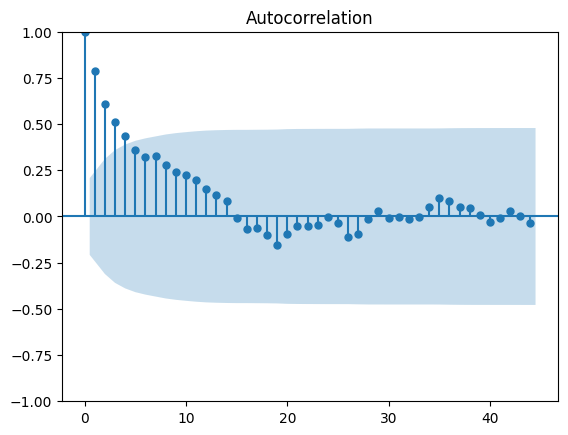

In [13]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_resampled['Amount'], lags=44)
plt.show()

# interpretation of the ACF plot
# The ACF plot shows that the time series is not stationary because the correlation is not decreasing to zero as the lag increases.

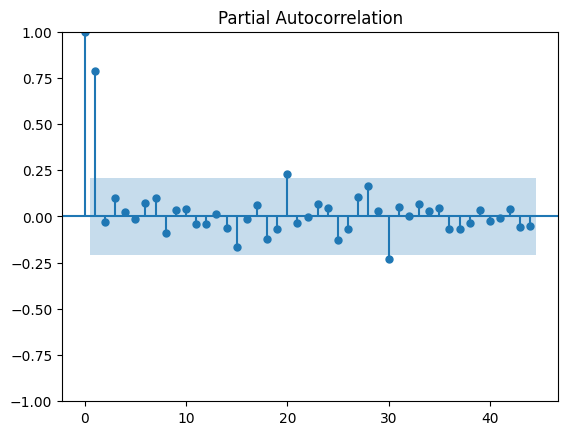

In [14]:
# PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_resampled['Amount'], lags=44)
plt.show()

# interpretation of the PACF plot
# The PACF plot shows that the time series is not stationary because the correlation is not decreasing to zero as the lag increases.